# Food Demand Forecasting

## Importing Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Loading Dataset

In [68]:
train = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\train.csv")
test = pd.read_csv("C:\\Users\\Archana\\Downloads\\test_QoiMO9B.csv")
center = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
meal = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\meal_info.csv")

In [69]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [72]:
train.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [74]:
train.shape

(456548, 9)

In [76]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [78]:
test.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0
32572,1291286,155,61,2490,276.45,276.45,0,0


In [80]:
test.shape

(32573, 8)

In [82]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [84]:
center.tail()

,center_id,city_code,region_code,center_type,op_area
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1
76,51,638,56,TYPE_A,7.0


In [86]:
center.shape

(77, 5)

In [88]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [90]:
meal.tail()

,meal_id,category,cuisine
46,2956,Fish,Continental
47,2104,Fish,Continental
48,2444,Seafood,Continental
49,2867,Seafood,Continental
50,1445,Seafood,Continental


In [92]:
meal.shape

(51, 3)

In [94]:
# Performing Merge on the Train Dataset to form a single DataFrame

In [96]:
train = pd.merge(train, meal, on = "meal_id")
test = pd.merge(test, meal,on = "meal_id")
train = pd.merge(train, center, how = "left", on = "center_id")
test = pd.merge(test, center, how = "left", on = "center_id")

In [98]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [100]:
train.shape

(456548, 15)

In [102]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0


In [104]:
test.shape

(32573, 14)

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [108]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [110]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [112]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [114]:
train.duplicated().sum()

0

In [116]:
# No duplicated values in the Dataset 

## Defining Numerical and Categorical Columns

In [119]:
num_train = train.select_dtypes(include='number')
cat_train = train.select_dtypes(include='object_')

In [121]:
num_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.0


In [123]:
cat_train.head()

,category,cuisine,center_type
0,Beverages,Thai,TYPE_C
1,Beverages,Thai,TYPE_C
2,Beverages,Thai,TYPE_C
3,Beverages,Indian,TYPE_C
4,Beverages,Indian,TYPE_C


In [125]:
num_train.columns.tolist()

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [127]:
cat_train.columns.tolist()

['category', 'cuisine', 'center_type']

In [129]:
# Checking for Missing Values
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [131]:
# This Dataset does not have any Missing Values

In [133]:
train['num_orders'].max()

24299

In [135]:
train['num_orders'].min()

13

## Exploratory Data Analysis

### Univariate Analysis:
##### Numerical Columns

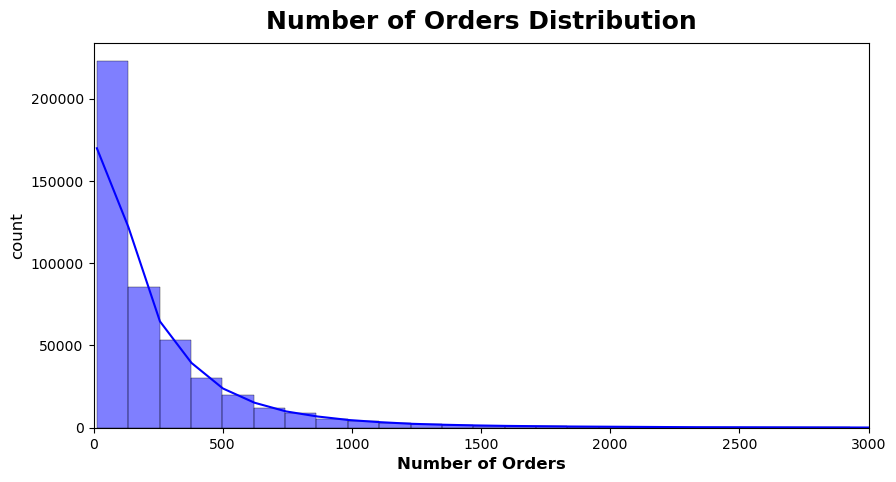

In [139]:
plt.subplots(figsize=(10,5))
sns.histplot(train.num_orders, bins=200, kde=True, color='blue')
plt.title('Number of Orders Distribution', fontsize=18,weight='bold',pad=10)
plt.ylabel('count',fontsize=12)
plt.xlabel('Number of Orders',weight='bold',fontsize=12)
plt.xlim(0,3000)
plt.show()

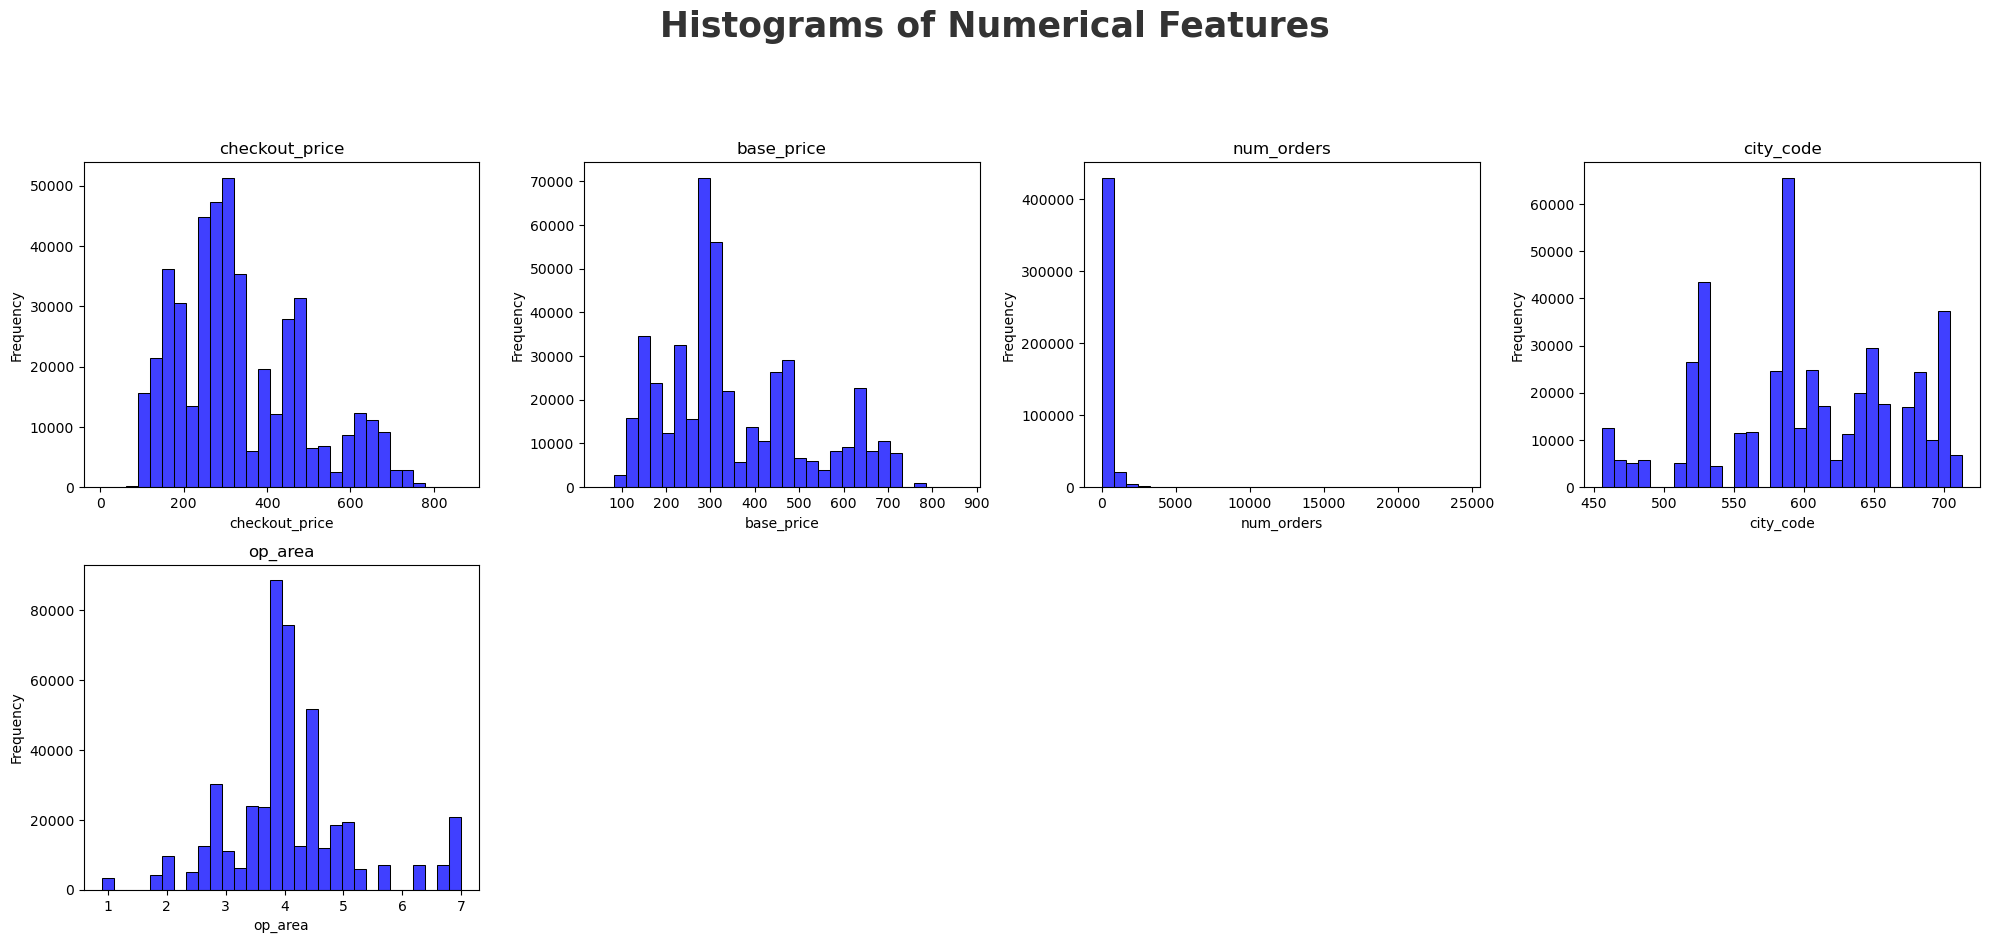

In [140]:
plt.figure(figsize=(20, 17))
plt.suptitle('Histograms of Numerical Features', fontsize=25, fontweight='bold', alpha=0.8, y=1.0)

num_drop = num_train.drop(columns=['emailer_for_promotion','homepage_featured','region_code','id','center_id','meal_id','week'])

for i, col in enumerate(num_drop.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(num_train[col], bins=30, color='b')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [143]:
# Checking for Skewness
skewness = num_drop.skew()
skewness

checkout_price    0.672330
base_price        0.637661
num_orders        6.929966
city_code        -0.209131
op_area           0.664414
dtype: float64

## Plotting BoxPlot for detecting Outliers

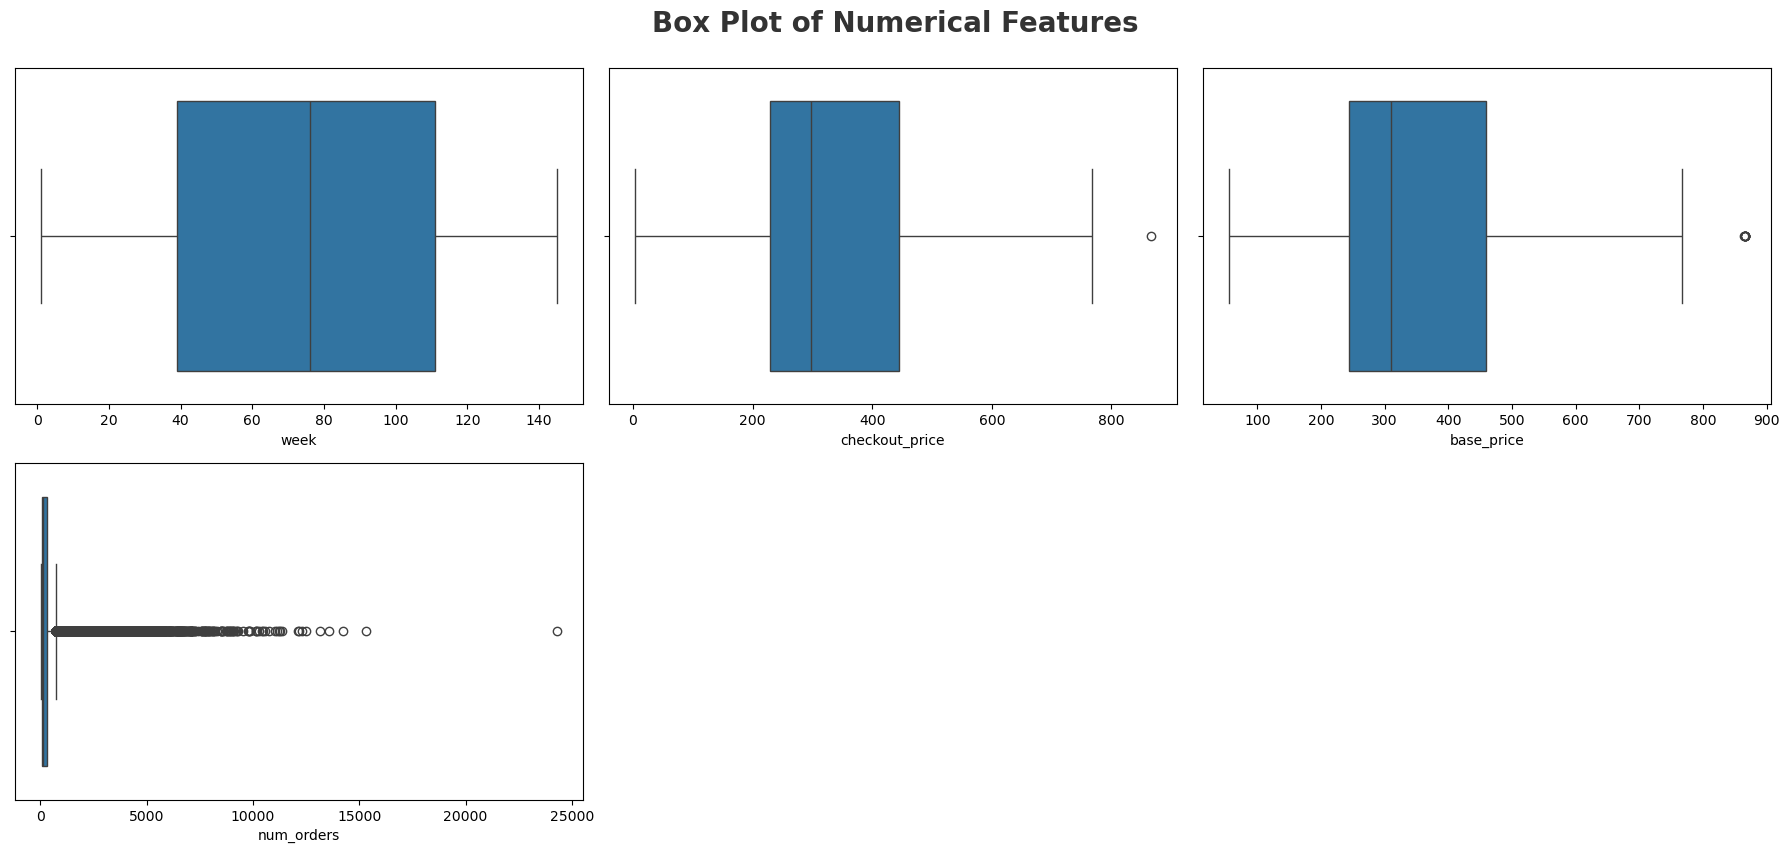

In [146]:
num_new = num_train.drop(columns=['emailer_for_promotion','homepage_featured','region_code','id','center_id','meal_id','city_code','op_area'])

plt.figure(figsize=(18, 12))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(num_new.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=train[num_new.columns[i]])
    plt.xlabel(num_new.columns[i])
    plt.tight_layout()

plt.show()

### Univariate Analysis:
##### Categorical Columns

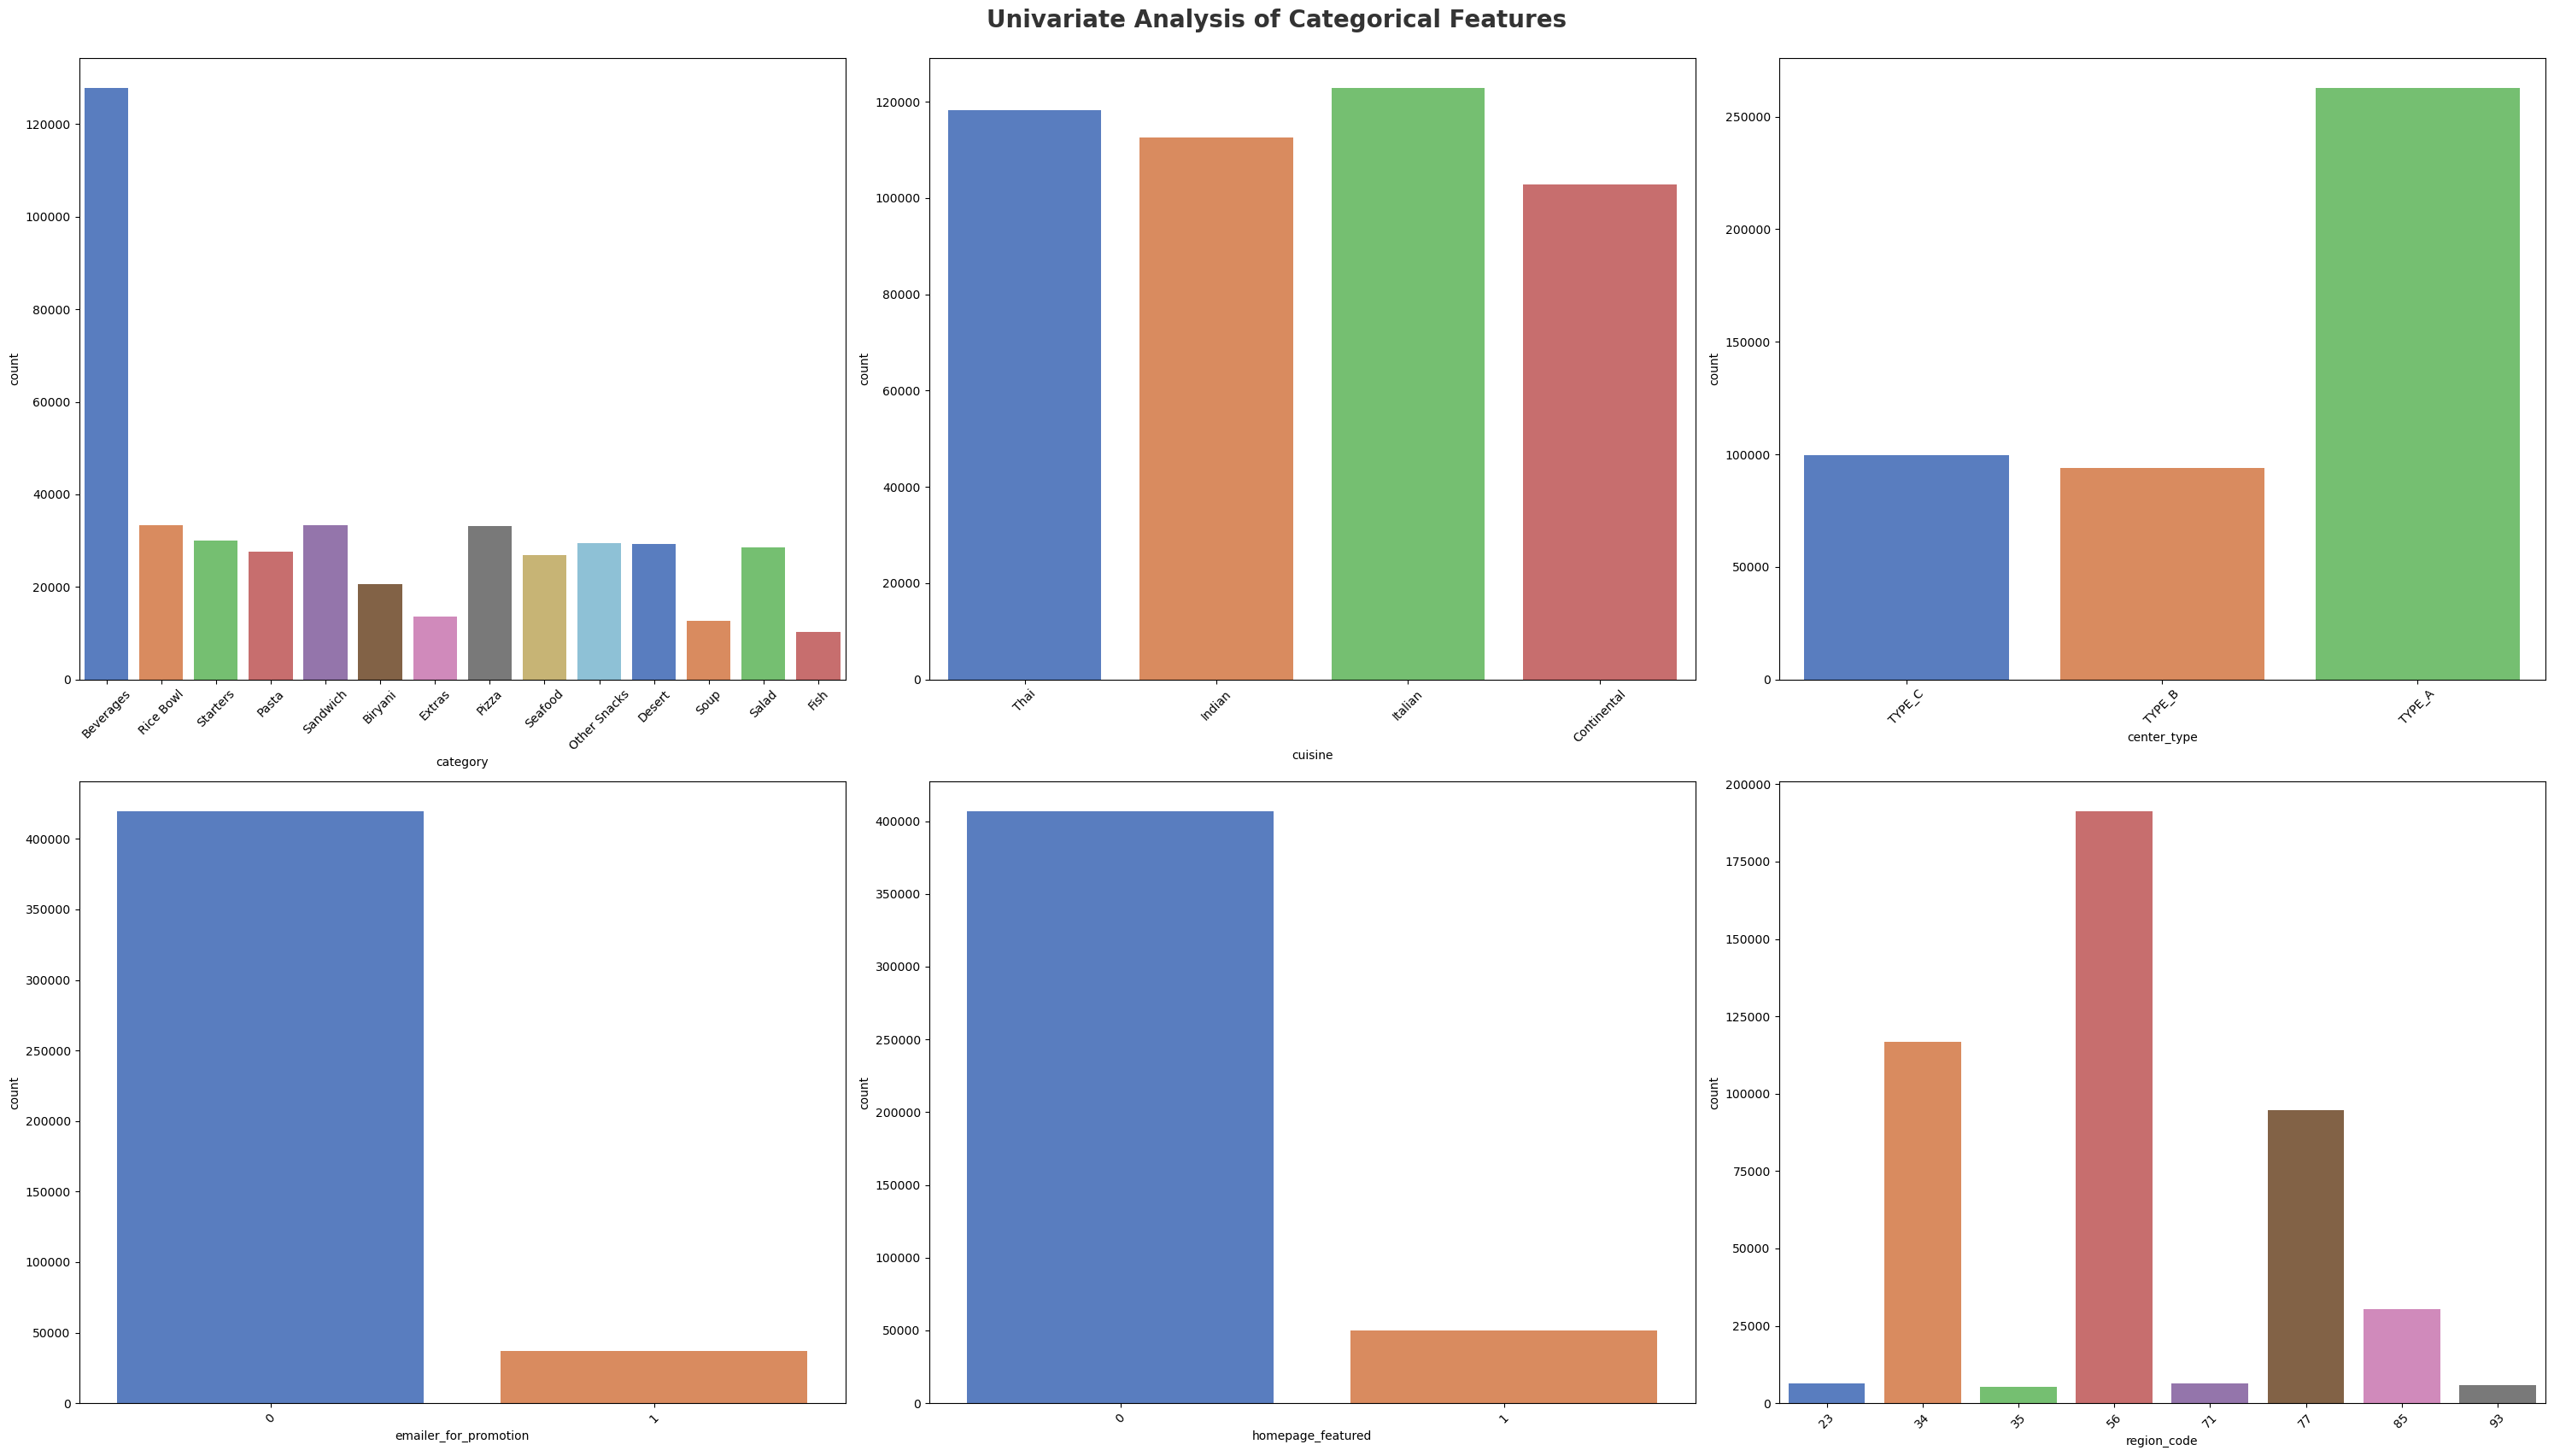

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 17))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat_col = ['category', 'cuisine', 'center_type', 'emailer_for_promotion', 'homepage_featured', 'region_code']
for i in range(len(cat_col)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=train[cat_col[i]], palette="muted", hue=train[cat_col[i]], legend=False) 
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## Bivariate Analysis

In [152]:
cont=[feature for feature in num_train if len(num_train[feature].unique())>=10]
print('Number of continuos features:',cont)

Number of continuos features: ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders', 'city_code', 'op_area']


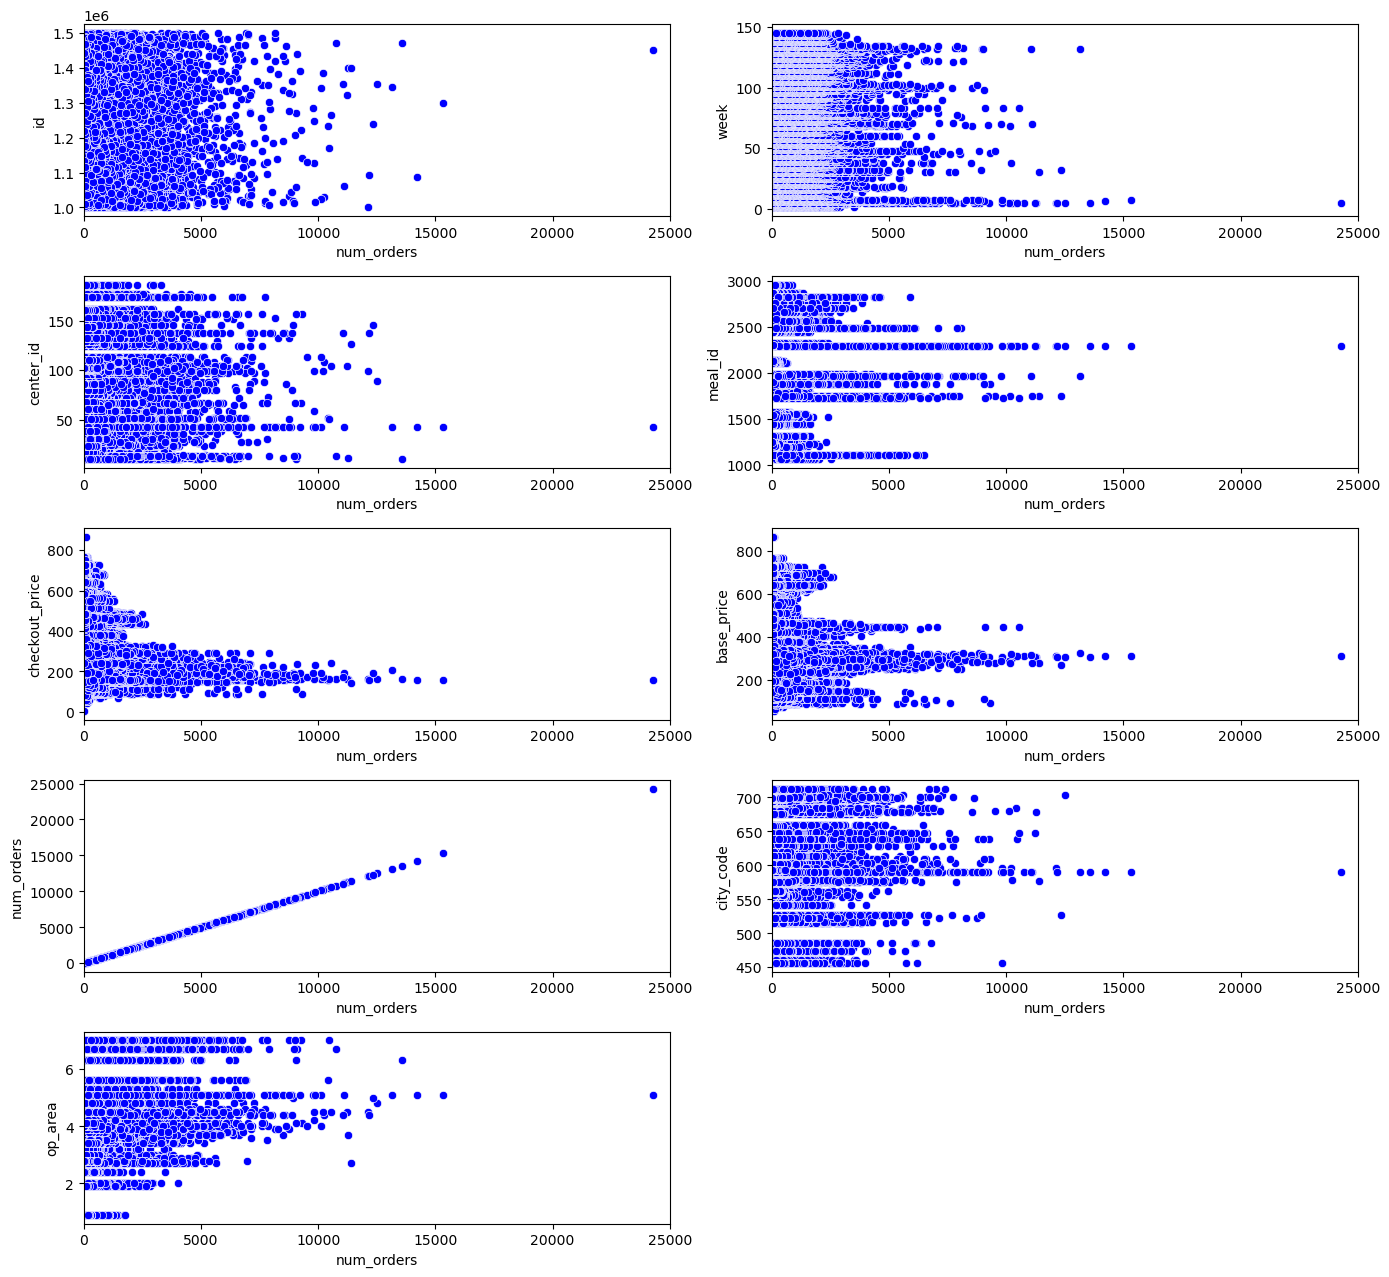

In [154]:
fig = plt.figure(figsize=(14, 20))

for i in range(0, len(cont)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data = train ,x='num_orders', y=cont[i], color='blue')
    plt.xlim(0,25000)
    
plt.tight_layout()
plt.show()

In [156]:
train[num_train.columns].corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


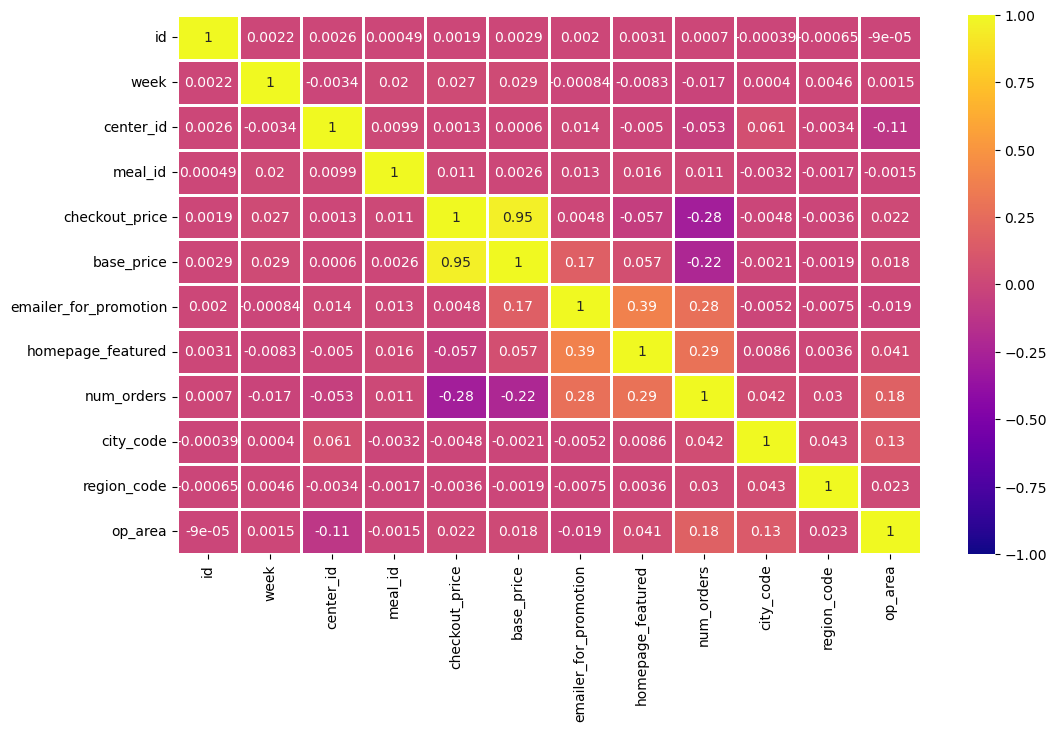

In [158]:
plt.figure(figsize=(12,7))
sns.heatmap(data=train[num_train.columns].corr(),annot=True,cmap='plasma',vmin=-1,vmax=1,linecolor='white',linewidths=2)
plt.show()

## Feature Engineering

In [161]:
train.drop(['id','op_area'], axis=1)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A
456544,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A
456545,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A
456546,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A


In [163]:
test.drop(['id','op_area'], axis=1)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type
0,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C
1,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C
2,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C
3,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C
4,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,484.09,0,0,Desert,Indian,473,77,TYPE_A
32569,155,61,2304,483.09,483.09,0,0,Desert,Indian,473,77,TYPE_A
32570,155,61,2664,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A
32571,155,61,2569,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A


### Scaling

In [166]:
scaler=StandardScaler()
num_col=['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'city_code',
 'region_code']
train[num_col]=scaler.fit_transform(train[num_col])
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,-1.776494,-0.589577,-0.254535,-1.277687,-1.256048,0,0,177,Beverages,Thai,0.686548,-0.034837,TYPE_C,2.0
1,1466964,-1.776494,-0.589577,-0.057246,-1.277687,-1.358465,0,0,270,Beverages,Thai,0.686548,-0.034837,TYPE_C,2.0
2,1346989,-1.776494,-0.589577,0.940160,-1.290568,-1.358278,0,0,189,Beverages,Thai,0.686548,-0.034837,TYPE_C,2.0
3,1338232,-1.776494,-0.589577,0.209460,0.047477,0.518763,0,0,54,Beverages,Indian,0.686548,-0.034837,TYPE_C,2.0
4,1448490,-1.776494,-0.589577,1.108221,-0.580222,-0.694746,0,0,40,Beverages,Indian,0.686548,-0.034837,TYPE_C,2.0


### Encoding

In [169]:
cat_col = [ 'category', 'cuisine', 'center_type','emailer_for_promotion','homepage_featured','region_code']
enc = OneHotEncoder(drop='first', sparse_output=False)
encod = enc.fit_transform(train[cat_col])
feature = enc.get_feature_names_out(cat_col)
enc_df = pd.DataFrame(encod, columns=feature)

In [170]:
train = pd.concat([train,enc_df],axis=1)
train.drop(['emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'center_type'],axis=1,inplace=True)

## Test Train Split

In [174]:
x=train.drop(['id','num_orders'],axis=1)
y=train['num_orders']

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training

In [179]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [195]:
y_pred = model.predict(x_test)

In [197]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.03821049173146424

In [201]:
sample = pd.DataFrame(test['id'])

In [203]:
model = pd.DataFrame(y_pred,columns=['num_orders'])

In [205]:
sample = pd.concat([sample,model],axis=1)

In [207]:
sample

,id,num_orders
0,1028232.0,67
1,1127204.0,162
2,1212707.0,67
3,1082698.0,13
4,1400926.0,447
...,...,...
91305,NaN,95
91306,NaN,431
91307,NaN,96
91308,NaN,13


In [209]:
sample.to_csv("Submission.csv",index=False)

In [211]:
import os
os.getcwd()

'C:\\Users\\Archana'